In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess

import common


In [13]:
df = common.run_benchmark(args="--ray_offset 0.2 --omp_n_threads 1 --p_rays_end 16")
df = df.set_index("n_rays")

# claculate rays per secon
df_rps = pd.DataFrame()
df_rps["rps_ovdb"] = df.index / df["time_ovdb"]
df_rps["rps_nvdb_cpu"] = df.index /df["time_nvdb_cpu"] 
df_rps["rps_nvdb_gpu"] = df.index / df["time_nvdb_gpu"]
df_rps

/home/hiti/Workspace/SelectedTopicsCompElectronics/build/src/raytracing --ray_offset 0.2 --omp_n_threads 1 --p_rays_end 16
Running benchmark with --ray_offset 0.2 --omp_n_threads 1 --p_rays_end 16
0.446: Running OpenVDB benchmark for 16 Rays
0.447: OpenVDB Finished in 0.000248964s (64.2663 kRays/s)
0.447: NanoVDB on CPU Finished in 0.00018357s (87.1602 kRays/s)
0.450: NanoVDB on GPU Finished in 0.000445668s (0.0359012 MRays/s)
0.450: Done

0.450: Running OpenVDB benchmark for 25 Rays
0.450: OpenVDB Finished in 0.00026238s (95.2817 kRays/s)
0.451: NanoVDB on CPU Finished in 0.000319789s (78.1765 kRays/s)
0.453: NanoVDB on GPU Finished in 0.000280885s (0.0890044 MRays/s)
0.453: Done

0.453: Running OpenVDB benchmark for 36 Rays
0.454: OpenVDB Finished in 0.000345809s (104.104 kRays/s)
0.454: NanoVDB on CPU Finished in 0.000221352s (162.637 kRays/s)
0.456: NanoVDB on GPU Finished in 0.000242772s (0.148287 MRays/s)
0.456: Done

0.456: Running OpenVDB benchmark for 64 Rays
0.457: OpenVDB Fi

,rps_ovdb,rps_nvdb_cpu,rps_nvdb_gpu
n_rays,,,
16,64266.319629,87160.211364,3.590116e+04
25,95281.652565,78176.547661,8.900440e+04
36,104103.710430,162636.886046,1.482873e+05
64,111102.045493,173728.456993,3.254778e+05
121,96578.256323,135058.811974,1.939388e+05
196,106119.752893,87267.416751,4.047730e+05
361,106506.641176,84664.870177,5.813373e+05
576,108264.164562,154564.067611,7.179735e+05
1024,107712.034401,154191.788083,2.710429e+06


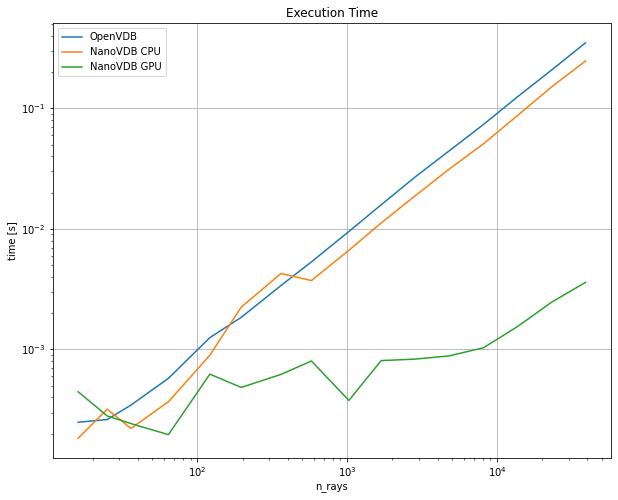

In [14]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["time_ovdb", "time_nvdb_cpu", "time_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot(y=cols)
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time [s]")
plt.title("Execution Time")
plt.show()


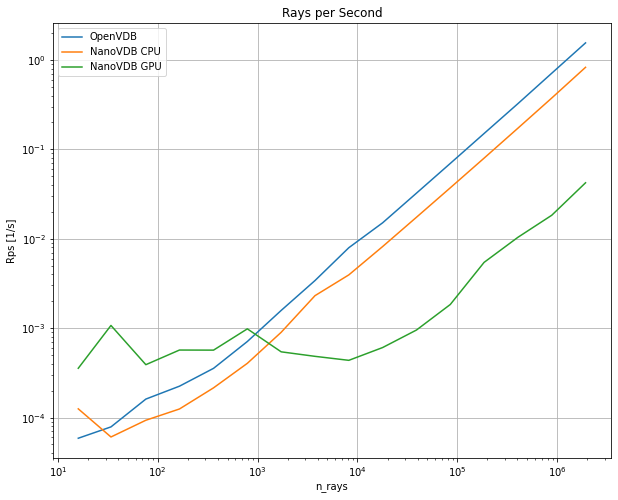

In [4]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["rps_ovdb", "rps_nvdb_cpu", "rps_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot()
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")
plt.show()

Text(0.5, 1.0, 'Relative Speed-Up for 1923096 rays (OpenVDB=1)')

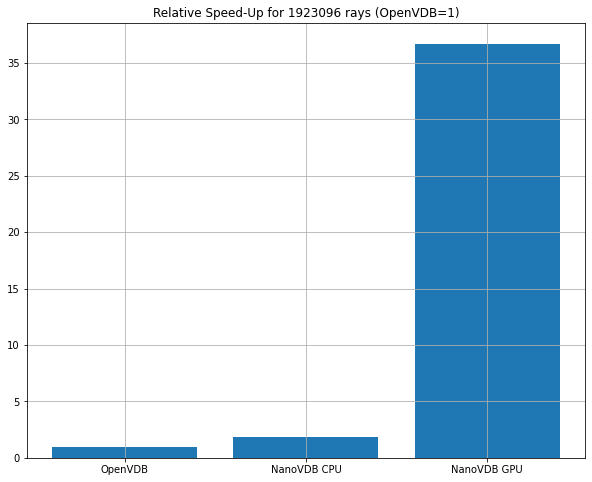

In [5]:
series = df_rps.iloc[-1]
series = series * 1/ series.nsmallest(1)[0]
n_rays = df_rps.index[-1]

plt.bar(cols_names, series.values)
plt.grid()
plt.title(f"Relative Speed-Up for {n_rays} rays (OpenVDB=1)")